# Week 5A: $\ell_1$ Regression

<font color='blue'><b>Goal:</b></font>
Solve linear regression with an $\ell_1$-error function using an LP.

<font color='blue'><b>Additional resources:</b></font> 
For an introduction on regression, see https://stat.ethz.ch/education/semesters/ss2016/regression/Regression.pdf.

## Introduction
A researcher would like to know if a child's height $H$ (in cm) can be predicted by their age $A$ (in years).
In other words, she would like to know if there is any relationship between $A$ and $H$.
She begins by observing the age and height of fifteen children. 
Her data is stored below. For example, the first child was at age 1 and has a height of 73.2 cm, and the second child was at age 1 and has a height of 73.3 cm.

In [1]:
# Observed ages in years
obs_age = [1,1,2,2,3,4,4,5,6,7,7,8,9,9,10]

# Observed heights in cm
obs_ht = [73.2,73.3,75.1,77.4,80.1,85.7,84.0,89.1,100.2,105.3,112.2,115.0,125.1,135.2,150.7]

We can visualize this data using the `matplotlib` library in Python.
The function `plt.scatter` plots the individual data points. 

We can also draw different lines through the data to visualize a linear relationship. 

*Remark: There are many ways to plot a line in Python. One method involves using the function `np.linspace()` in the `numpy` package, which we have already seen in Week 2's exercises.*

The following code plots the data and draws the lines $H = 7A+65$ and $H = 5.75A+70$.

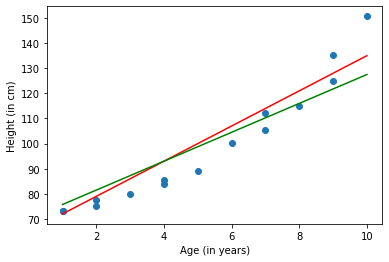

In [2]:
# Import Python's plotting tools (matplotlib) and math tools (numpy)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot the points
plt.scatter(obs_age, obs_ht)

# Draw the line H = 7A+65
A = np.linspace(1,10,100)
H = 7*A + 65
plt.plot(A, H, color='red')

# Draw the line H = 5.75A+70
H = 5.75*A + 70
plt.plot(A, H, color='green')


plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()

Both lines $H = 7A + 65$ and $H = 5.75A + 70$ seem to capture some of the correlation between `obs_ages` and `obs_ht`.
However, which line fits the data better? In regression, we measure "goodness of fit" with a loss function. Mathematically, we can formulate this problem as follows:

Given values $\alpha, \beta \in \mathbb{R}$, we say that the $\ell_1$-error of the line $H = \beta A + \alpha$ is equal to 
$$
\displaystyle \sum_{i=1}^{15} |\text{obs_ht}_{~i} - (\beta \times \text{obs_age}_{~i} + \alpha)|.
$$

The line $H = 7A + 65$ has an $\ell_1$-error of $90.19$, and the line $H = 5.75A + 70$ has an $\ell_1$-error of $100.80$.

## Task 1: Find the optimal line minimizing $\ell_1$-error
Write an LP that finds parameters $\alpha$ and $\beta$ so that the line $H = \beta A + \alpha$ minimizes the $\ell_1$-error. You should have already seen similar ideas from previous problem sets.

**Your task:** Implement this LP and solve it. Also, plot the optimal line $H$ that you found together with the data.

_Hint 1_: You may need to create many variables with a similar structure in this LP. For example, one can come up with an LP with variables $e_1,\cdots,e_{15}$ for the errors in absolute value. It will be time consuming to manually add these 15 variables. A more efficient way would be using a for loop to create a list of all these variables. As an example, the following code

&emsp;&emsp; `e = [pulp.LpVariable(f"e_{i}") for i in range(3)]` 

will create a list called `e`, it contains 3 elements `e_0,e_1,e_2`, which are all LP variables. 

In [ ]:
import pulp

# Create a list of 3 variables
test_LP = pulp.LpProblem("Test_LP", pulp.LpMinimize)
e = [pulp.LpVariable(f"e_{i}") for i in range(3)]
e

_Hint 2_: If you adopt the notations in _Hint 1_, your objective function is likely in the form $\sum_{i=1}^{15}e_i$. You can represent the sum as `pulp.lpSum(e)` if you have created a list $e$ of variables $e_i$ using the code above. To be precise, `pulp.lpSum(e)` only sums up the variables from the list `e`, it does not set this sum to be the objective function automatically. Therefore, you need to add the objective function using the normal way.

In [ ]:
# We add the objective function e_1+e_2+e_3 using lpSum()
test_LP += pulp.lpSum(e)
test_LP.objective

_Hint 3_: Similarly, there are many constraints that are of the same form. Try to implement these constraints systematically using loops instead of manually adding them one by one.

In [ ]:
# Solve the L-1 linear regression problem
# Denote the number of observations as n
n = len(obs_age)  

In [ ]:
# Load PuLP and set up the LP
linRegLP = '???'

# Define variables
'???'


In [ ]:
# Set the objective function and check it
linRegLP += '???'
linRegLP.objective


In [ ]:
# Add constraints and check them. You can use a loop to go through all n data points.
'???'
linRegLP.constraints


In [ ]:
# Solve the LP
linRegLP.solve()


In [ ]:
# Plot the optimal line

# Plot the points
plt.scatter(obs_age,obs_ht)

# Draw the optimal line
A = '???'
H = '???'
plt.plot(A, H, color = 'red')

plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()

## Task 2: Find the optimal quadratic curve minimizing $\ell_1$-error

Perhaps the relationship between the age and the height is not linear.
In fact, the data in the previous plot suggests that the relationship could be quadratic. 
We can also use linear programming to solve this quadratic regression problem.

Given values $\alpha_0, \alpha_1, \alpha_2 \in \mathbb{R}$, we say that the $\ell_1$-error of the quadratic function $H = \alpha_2 A^2 + \alpha_1 A + \alpha_0$ is equal to 
$$
\displaystyle \sum_{i=1}^{15} |\text{obs_ht}_{~i} - (\alpha_2 \times \text{obs_age}_{~i}^2 + \alpha_1 \times \text{obs_age}_{~i} + \alpha_0)|.
$$

Write an LP that finds parameters $\alpha_0$, $\alpha_1$ and $\alpha_2$ so that the quadratic function $H = \alpha_2 A^2 + \alpha_1 A + \alpha_0$ minimizes the $\ell_1$-error.

**Your Task:**
Implement this LP and solve it and plot the optimal curve $H$ that you found together with the data.


In [ ]:
# Solve the L-1 quadratic regression problem

'???'


In [ ]:
# Plot the optimal curve

# Plot the points
plt.scatter(obs_age,obs_ht)

# Plot the optimal quadratic function
A = '???'
H = '???'
plt.plot(A, H, color = 'red')

plt.xlabel("Age (in years)")
plt.ylabel("Height (in cm)")
plt.show()